In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

In [3]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
######################################################################
# OneLayerNetwork
######################################################################

class OneLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(OneLayerNetwork, self).__init__()

        ### ========== TODO : START ========== ###
        ### part d: implement OneLayerNetwork with torch.nn.Linear
        self.W = torch.nn.Linear(784, 3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part d: implement the foward function
        outputs = self.W(x)
        ### ========== TODO : END ========== ###
        return outputs

In [5]:
######################################################################
# TwoLayerNetwork
######################################################################

class TwoLayerNetwork(torch.nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        ### ========== TODO : START ========== ###
        ### part g: implement TwoLayerNetwork with torch.nn.Linear
        self.W1 = torch.nn.Linear(784,400)
        self.W2 = torch.nn.Linear(400,3)
        ### ========== TODO : END ========== ###

    def forward(self, x):
        # x.shape = (n_batch, n_features)

        ### ========== TODO : START ========== ###
        ### part g: implement the foward function
        firstLayer = self.W1(x)
        sigmoid = torch.nn.Sigmoid()
        firstLayer = sigmoid(firstLayer)
        outputs = self.W2(firstLayer)
        ### ========== TODO : END ========== ###
        return outputs

In [6]:
# load data from csv
# X.shape = (n_examples, n_features), y.shape = (n_examples, )
def load_data(filename):
    data = np.loadtxt(filename)
    y = data[:, 0].astype(int)
    X = data[:, 1:].astype(np.float32) / 255
    return X, y

In [7]:
# plot one example
# x.shape = (features, )
def plot_img(x):
    x = x.reshape(28, 28)
    img = Image.fromarray(x*255)
    plt.figure()
    plt.imshow(img)
    return

In [8]:
def evaluate_loss(model, criterion, dataloader):
    model.eval()
    total_loss = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()
        
    return total_loss / len(dataloader)

In [9]:
def evaluate_acc(model, dataloader):
    model.eval()
    total_acc = 0.0
    for batch_X, batch_y in dataloader:
        outputs = model(batch_X)
        predictions = torch.argmax(outputs, dim=1)
        total_acc += (predictions==batch_y).sum()
        
    return total_acc / len(dataloader.dataset)

In [10]:
def train(model, criterion, optimizer, train_loader, valid_loader):
    train_loss_list = []
    valid_loss_list = []
    train_acc_list = []
    valid_acc_list = []
    for epoch in range(1, 31):
        model.train()
        for batch_X, batch_y in train_loader:
            ### ========== TODO : START ========== ###
            ### part f: implement the training process
            y_pred = model.forward(batch_X) # forward pass
            optimizer.zero_grad() # initialize gradients to zeros
            loss = criterion(y_pred, batch_y) # computing loss
            loss.backward()
            optimizer.step() # updating model parameters
            ### ========== TODO : END ========== ###
            
        train_loss = evaluate_loss(model, criterion, train_loader)
        valid_loss = evaluate_loss(model, criterion, valid_loader)
        train_acc = evaluate_acc(model, train_loader)
        valid_acc = evaluate_acc(model, valid_loader)
        train_loss_list.append(train_loss)
        valid_loss_list.append(valid_loss)
        train_acc_list.append(train_acc)
        valid_acc_list.append(valid_acc)

        print(f"| epoch {epoch:2d} | train loss {train_loss:.6f} | train acc {train_acc:.6f} | valid loss {valid_loss:.6f} | valid acc {valid_acc:.6f} |")

    return train_loss_list, valid_loss_list, train_acc_list, valid_acc_list

Data preparation...
Start training OneLayerNetwork...
| epoch  1 | train loss 0.199644 | train acc 0.980000 | valid loss 0.231043 | valid acc 0.940000 |
| epoch  2 | train loss 0.132053 | train acc 0.986667 | valid loss 0.169362 | valid acc 0.953333 |
| epoch  3 | train loss 0.102773 | train acc 0.986667 | valid loss 0.144094 | valid acc 0.960000 |
| epoch  4 | train loss 0.085251 | train acc 0.990000 | valid loss 0.129667 | valid acc 0.960000 |
| epoch  5 | train loss 0.073256 | train acc 0.990000 | valid loss 0.120162 | valid acc 0.966667 |
| epoch  6 | train loss 0.064410 | train acc 0.990000 | valid loss 0.113361 | valid acc 0.966667 |
| epoch  7 | train loss 0.057565 | train acc 0.993333 | valid loss 0.108223 | valid acc 0.966667 |
| epoch  8 | train loss 0.052087 | train acc 0.996667 | valid loss 0.104188 | valid acc 0.966667 |
| epoch  9 | train loss 0.047593 | train acc 1.000000 | valid loss 0.100928 | valid acc 0.966667 |
| epoch 10 | train loss 0.043832 | train acc 1.000000 |

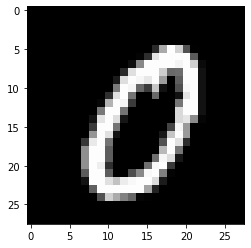

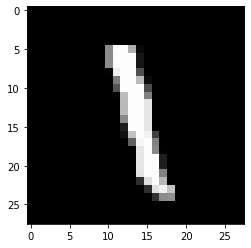

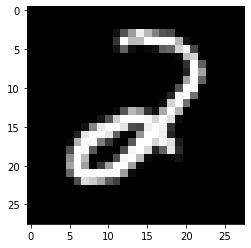

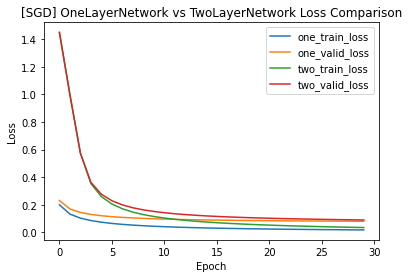

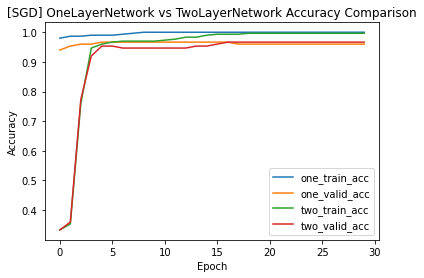

OneLayerNetwork Test Accuracy: 97.33 %
TwoLayerNetwork Test Accuracy: 97.33 %
Improving TwoLayerNetwork with learning rate 0.05...
Start training OneLayerNetwork with Adam optimizer...
| epoch  1 | train loss 0.652176 | train acc 0.930000 | valid loss 0.643495 | valid acc 0.900000 |
| epoch  2 | train loss 0.448845 | train acc 0.960000 | valid loss 0.450156 | valid acc 0.953333 |
| epoch  3 | train loss 0.340191 | train acc 0.970000 | valid loss 0.347157 | valid acc 0.953333 |
| epoch  4 | train loss 0.275654 | train acc 0.976667 | valid loss 0.286565 | valid acc 0.953333 |
| epoch  5 | train loss 0.233069 | train acc 0.976667 | valid loss 0.247042 | valid acc 0.953333 |
| epoch  6 | train loss 0.202674 | train acc 0.976667 | valid loss 0.219164 | valid acc 0.960000 |
| epoch  7 | train loss 0.179708 | train acc 0.976667 | valid loss 0.198359 | valid acc 0.960000 |
| epoch  8 | train loss 0.161607 | train acc 0.980000 | valid loss 0.182174 | valid acc 0.960000 |
| epoch  9 | train loss

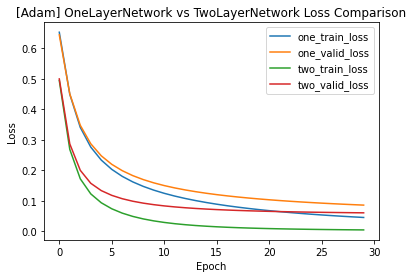

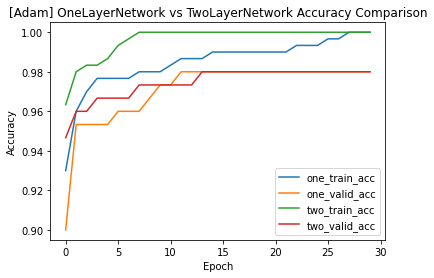

OneLayerNetwork Test Accuracy: 97.33 %
TwoLayerNetwork Test Accuracy: 96.67 %


In [11]:
######################################################################
# main
######################################################################

def main():

    # fix random seed
    np.random.seed(0)
    torch.manual_seed(0)

    # load data with correct file path

    ### ========== TODO : START ========== ###
    data_directory_path =  "/content/drive/MyDrive/20WINTER/CS M146/PSET3"
    ### ========== TODO : END ========== ###

    # X.shape = (n_examples, n_features)
    # y.shape = (n_examples, )
    X_train, y_train = load_data(os.path.join(data_directory_path, "ps3_train.csv"))
    X_valid, y_valid = load_data(os.path.join(data_directory_path, "ps3_valid.csv"))
    X_test, y_test = load_data(os.path.join(data_directory_path, "ps3_test.csv"))

    ### ========== TODO : START ========== ###
    ### part a: print out three training images with different labels
    setX0, setX1, setX2 = False, False, False
    while True:
        randomRow = np.random.randint(y_train.shape[0])
        if setX0 and setX1 and setX2:
          break
        if not setX0 and y_train[randomRow] == 0:
          X0 = X_train[randomRow]
          setX0 = True
        if not setX1 and y_train[randomRow] == 1:
          X1 = X_train[randomRow]
          setX1 = True
        if not setX2 and y_train[randomRow] == 2:
          X2 = X_train[randomRow]
          setX2 = True 

    plot_img(X0)
    plot_img(X1)
    plot_img(X2)
    ### ========== TODO : END ========== ###

    print("Data preparation...")

    ### ========== TODO : START ========== ###
    ### part b: convert numpy arrays to tensors
    X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)
    X_valid, y_valid = torch.from_numpy(X_valid), torch.from_numpy(y_valid)
    X_test, y_test = torch.from_numpy(X_test), torch.from_numpy(y_test)
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part c: prepare dataloaders for training, validation, and testing
    ###         we expect to get a batch of pairs (x_n, y_n) from the dataloader
    train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=10)
    valid_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_valid, y_valid), batch_size=10)
    test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_test, y_test), batch_size=10)
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part e: prepare OneLayerNetwork, criterion, and optimizer
    model_one = OneLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_one.parameters(), lr=0.05)
    ### ========== TODO : END ========== ###

    print("Start training OneLayerNetwork...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    ### ========== TODO : START ========== ###
    ### part h: prepare TwoLayerNetwork, criterion, and optimizer
    model_two = TwoLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model_two.parameters(), lr=0.05)
    ### ========== TODO : END ========== ###

    print("Start training TwoLayerNetwork...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two

    ### ========== TODO : START ========== ###
    ### part i: generate a plot to compare one_train_loss, one_valid_loss, two_train_loss, two_valid_loss
    plt.figure()
    plt.plot(one_train_loss, label='one_train_loss')
    plt.plot(one_valid_loss, label='one_valid_loss')
    plt.plot(two_train_loss, label='two_train_loss')
    plt.plot(two_valid_loss, label='two_valid_loss')
    plt.title('[SGD] OneLayerNetwork vs TwoLayerNetwork Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part j: generate a plot to compare one_train_acc, one_valid_acc, two_train_acc, two_valid_acc
    plt.figure()
    plt.plot(one_train_acc, label='one_train_acc')
    plt.plot(one_valid_acc, label='one_valid_acc')
    plt.plot(two_train_acc, label='two_train_acc')
    plt.plot(two_valid_acc, label='two_valid_acc')
    plt.title('[SGD] OneLayerNetwork vs TwoLayerNetwork Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    ### ========== TODO : END ========== ##

    ### ========== TODO : START ========== ###
    ### part k: calculate the test accuracy
    one_test_acc = float(evaluate_acc(model_one, test_loader))*100
    two_test_acc = float(evaluate_acc(model_two, test_loader))*100

    print('OneLayerNetwork Test Accuracy: %2.2f '% (one_test_acc) + '%')
    print('TwoLayerNetwork Test Accuracy: %2.2f '% (two_test_acc) + '%')

    print("Improving TwoLayerNetwork with learning rate 0.05...")
    # model_two = TwoLayerNetwo=rk()
    # criterion = torch.nn.CrossEntropyLoss()
    # optimizer = torch.optim.SGD(model_two.parameters(), lr=0.05)
    # results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    # two_test_acc = float(evaluate_acc(model_two, test_loader))*100
    # print('NEW TwoLayerNetwork Test Accuracy: %2.2f '% (two_test_acc) + '%')
    ### ========== TODO : END ========== ###

    ### ========== TODO : START ========== ###
    ### part l: replace the SGD optimizer with the Adam optimizer and do the experiments again
    model_one = OneLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_one.parameters(),  lr=0.0005)
    print("Start training OneLayerNetwork with Adam optimizer...")
    results_one = train(model_one, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    model_two = TwoLayerNetwork()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model_two.parameters(),  lr=0.0005)
    print("Start training TwoLayerNetwork with Adam optimizer...")
    results_two = train(model_two, criterion, optimizer, train_loader, valid_loader)
    print("Done!")

    one_train_loss, one_valid_loss, one_train_acc, one_valid_acc = results_one
    two_train_loss, two_valid_loss, two_train_acc, two_valid_acc = results_two
    
    plt.figure()
    plt.plot(one_train_loss, label='one_train_loss')
    plt.plot(one_valid_loss, label='one_valid_loss')
    plt.plot(two_train_loss, label='two_train_loss')
    plt.plot(two_valid_loss, label='two_valid_loss')
    plt.title('[Adam] OneLayerNetwork vs TwoLayerNetwork Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(one_train_acc, label='one_train_acc')
    plt.plot(one_valid_acc, label='one_valid_acc')
    plt.plot(two_train_acc, label='two_train_acc')
    plt.plot(two_valid_acc, label='two_valid_acc')
    plt.title('[Adam] OneLayerNetwork vs TwoLayerNetwork Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    one_test_acc = float(evaluate_acc(model_one, test_loader))*100
    two_test_acc = float(evaluate_acc(model_two, test_loader))*100

    print('OneLayerNetwork Test Accuracy: %2.2f '% (one_test_acc) + '%')
    print('TwoLayerNetwork Test Accuracy: %2.2f '% (two_test_acc) + '%')
    ### ========== TODO : END ========== ###



if __name__ == "__main__":
    main()